In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import os
sys.path.append("../")
from search_world.utils.analysis_utils import get_trials_dataframe, get_dataset_paths, get_trials_features, get_consistency, get_condition_df, get_condition_features
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

%matplotlib widget

In [3]:
base_dir = '../logs'

all_job_ids = [f for f in os.scandir(base_dir) if f.is_dir() and f.path != os.path.join(base_dir,'slurm_logs')]
df = get_trials_features(get_trials_dataframe(get_dataset_paths(job_ids=all_job_ids, base_dir=''), overwrite=False))
condition_df = get_condition_features(get_condition_df(df, condition=['length', 'n_corr', 'agent_init_pos', 'target_pos']), df)
consistency_df = get_consistency(condition_df, df, condition=['length', 'n_corr', 'agent_init_pos', 'target_pos'])

Index(['MLSAgent', 'QMDPAgent'], dtype='object', name='name')


In [5]:
df.columns

Index(['trial_index', 'dataset_index', 'action', 'done', 'info', 'job_id',
       'obs', 'reward', 'step', 'env', 'model', 'length', 'n_corr',
       'target_pos', 'agent_init_pos', 'agent_initial_state', 'target_state',
       'maze', 'name', 'horizon', 'lambda', 'agent_dist'],
      dtype='object')

# Consistency across agents

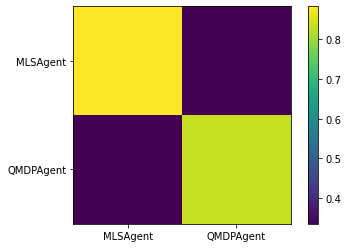

In [707]:
%matplotlib inline
f, ax = plt.subplots(1, 1)
im = ax.imshow(consistency_df)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(consistency_df.columns)
ax.set_yticklabels(consistency_df.columns)
plt.colorbar(im)
plt.show()

## MLS-QMDP

In [713]:
%matplotlib widget
mls_df = condition_df[condition_df.index.get_level_values('name') == 'MLSAgent'].reset_index().set_index(condition)
qmdp_df = condition_df[condition_df.index.get_level_values('name') == 'QMDPAgent'].reset_index().set_index(condition)
merged = mls_df.merge(qmdp_df, on=condition, suffixes=['_mls', '_qmdp'])
conditions = merged.index
f, ax = plt.subplots(1, 1)
f.suptitle('MLS-QMDP consistency')
sc = sns.scatterplot(data=merged, x="error_mls", y="error_qmdp", ax=ax)

cursor = mplcursors.cursor(sc, hover=True)
# # by default the annotation displays the xy positions
# # this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text="length=%d, n_corr=%d, agent_init_pos=%d, target_pos=%d"%(conditions[sel.index]))

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …